In [ ]:
import os
import sys
from time import sleep

import matplotlib.pyplot as plt
import numpy as np

import GCode
import GRBL
import utils


# Inkscape G-Code Laser Numpy

## Test Setup

# Code:

In [15]:
%matplotlib inline

In [16]:
cnc = GRBL.GRBL(port="/dev/cnc_3018")
cnc.laser_mode = 1


ok


In [17]:
def init():
    program = GCode.GCode()
    program.G0(F=500)
    program.G1(F=300)
    program.M3(S=1)
    program.G28()
    program.G21()  # Metric Units
    program.G90()  # Absolute positioning.
    program.G92(X=0, Y=0)
    return program


In [18]:
print(cnc.laser_mode)


1.0


In [19]:
cnc.status


'<Idle|MPos:-255.900,-136.000,-1.000|Bf:15,127|FS:0,0|Ov:100,100,100>'

In [20]:
cnc.run("G28")


0.10451722145080566

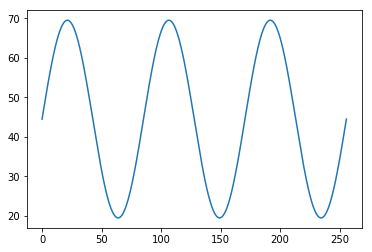

In [24]:
X = np.arange(0, 255.8, 0.01)

f = (3 * 2 * np.pi) / X[-1]

A = 25
Y = A * np.sin(X * f) + 89 / 2

plt.plot(X, Y)


In [46]:
x


0

In [47]:
y


44.5

In [59]:
prog = GCode.GCode()
prog.G28()
prog.G0(X=X[0], Y=Y[0])

prog.M4(S=250)
for x, y in zip(X, Y):
    prog.G1(X=np.round(x, 4), Y=np.round(y, 4), F=300)
prog.M5()
prog.G28()


In [60]:
prog


<GCode>[cmds=255]

In [61]:
cnc.run(prog)


92.31557559967041

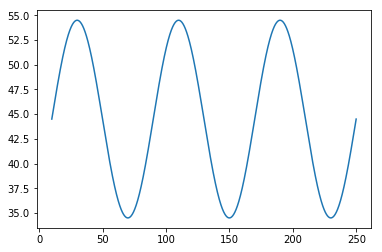

In [35]:
X = np.arange(10, 250, 0.1)
cycles = 3
f = (cycles * 2 * np.pi) / (X[-1] - X[0])

A = 10
Y = A * np.sin((X - X[0]) * f) + 89 / 2
_ = plt.plot(X, Y)


In [36]:
prog = GCode.GCode()
prog.G28()
prog.G0(X=X[0], Y=Y[0])

prog.M4(S=255)
for x, y in zip(X, Y):
    prog.G1(X=np.round(x, 4), Y=np.round(y, 4), F=400)
prog.M5()
prog.G28()


In [37]:
cnc.run(prog)


261.13596963882446

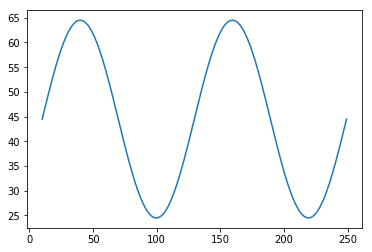

In [39]:
X = np.arange(10, 250, 1)
cycles = 2
f = (cycles * 2 * np.pi) / (X[-1] - X[0])

A = 20
Y = A * np.sin((X - X[0]) * f) + 89 / 2
_ = plt.plot(X, Y)


In [40]:
prog = GCode.GCode()
prog.G28()
prog.G0(X=X[0], Y=Y[0])

prog.M4(S=255)
for x, y in zip(X, Y):
    prog.G1(X=np.round(x, 4), Y=np.round(y, 4), F=400)
prog.M5()
prog.G28()


In [41]:
cnc.run(prog)


50.99362301826477

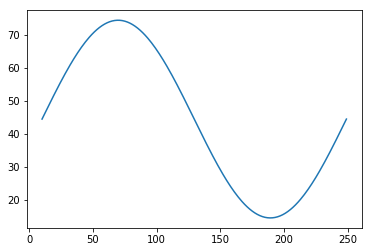

In [42]:
X = np.arange(10, 250, 1)
cycles = 1
f = (cycles * 2 * np.pi) / (X[-1] - X[0])

A = 30
Y = A * np.sin((X - X[0]) * f) + 89 / 2
_ = plt.plot(X, Y)


In [43]:
prog = GCode.GCode()
prog.G28()
prog.G0(X=X[0], Y=Y[0])

prog.M4(S=255)
for x, y in zip(X, Y):
    prog.G1(X=np.round(x, 4), Y=np.round(y, 4), F=400)
prog.M5()
prog.G28()


In [44]:
cnc.run(prog)


47.234615325927734

In [46]:
sys.path.append(os.path.abspath(".."))


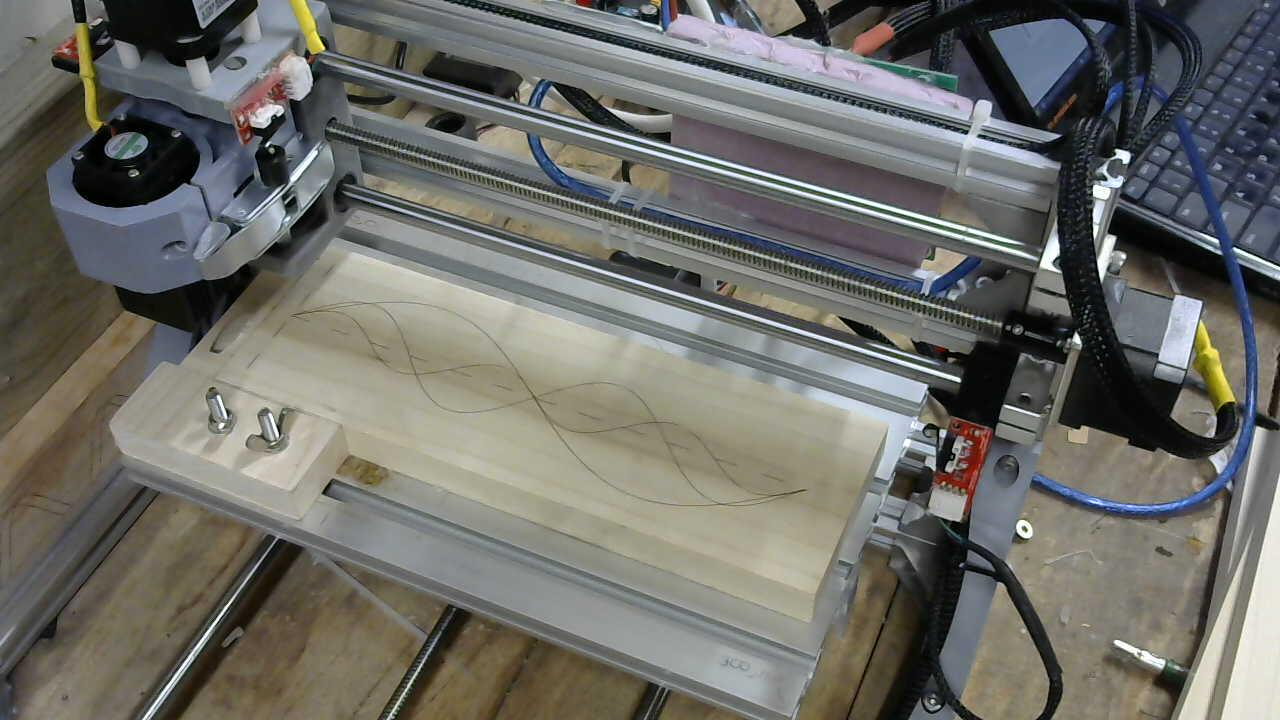

In [49]:
utils.picture()
